In [43]:
import pickle
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
import collections
import numpy as np
import time
import pandas as pd
mpl.style.use('../scrartcl.mplstyle')

In [56]:
default_filename = '../workspace/usoc_f/01a41e934ad7a80462c7ba2eb13e782f6148ddb0.pkl'
filename = os.environ.get('filename', default_filename)
with open(filename, 'rb') as fp:
    result = pickle.load(fp)
    
data = result['data']
z = result['data']['z']
egos = result['data']['egos']
alters = result['data']['alters']
weights = result['data']

In [57]:
valids = data['egos']
invalids = data['invalid_egos']
total = len(valids) + len(invalids)
print(f'Total: {total}')
print(f'Valid: {len(valids)} ({100 * len(valids) / total:.3f}%)')
print(f'Invalid: {len(invalids)} ({100 * len(invalids) / total:.3f}%)')

invalids = collections.Counter(invalids._invalid)
for key, value in invalids.items():
    print(f'Invalid ({key}): {value} ({100 * value / total:.3f}%)')
    
print()
missing = invalids.get('some values missing', 0)
valid_and_missing = len(valids) + missing
print(f'Valid and missing: {valid_and_missing}')
print(f'Valid: {len(valids)} ({100 * len(valids) / valid_and_missing:.3f}%)')
print(f'Missing: {missing} ({100 * missing / valid_and_missing:.3f}%)')

Total: 45188
Valid: 29082 (64.358%)
Invalid: 16106 (35.642%)
Invalid (zero weight): 14700 (32.531%)
Invalid (job: something else): 133 (0.294%)
Invalid (some values missing): 319 (0.706%)
Invalid (age < 18): 954 (2.111%)

Valid and missing: 29401
Valid: 29082 (98.915%)
Missing: 319 (1.085%)


In [58]:
valids = data['alters']
invalids = data['invalid_alters']
total = len(valids) + len(invalids)
print(f'Total: {total}')
print(f'Valid: {len(valids)} ({100 * len(valids) / total:.3f}%)')
print(f'Invalid: {len(invalids)} ({100 * len(invalids) / total:.3f}%)')

invalids = collections.Counter(invalids._invalid)
for key, value in invalids.items():
    print(f'Invalid ({key}): {value} ({100 * value / total:.3f}%)')
    
print()
missing = invalids.get('some values missing', 0)
valid_and_missing = len(valids) + missing
print(f'Valid and missing: {valid_and_missing}')
print(f'Valid: {len(valids)} ({100 * len(valids) / valid_and_missing:.3f}%)')
print(f'Missing: {missing} ({100 * missing / valid_and_missing:.3f}%)')

Total: 87246
Valid: 61892 (70.940%)
Invalid: 25354 (29.060%)
Invalid (is relative): 10614 (12.166%)
Invalid (outside UK): 1821 (2.087%)
Invalid (all values missing): 12035 (13.794%)
Invalid (age < 18): 273 (0.313%)
Invalid (some values missing): 611 (0.700%)

Valid and missing: 62503
Valid: 61892 (99.022%)
Missing: 611 (0.978%)


In [37]:
data['invalid_alters']

rec.array([('female', 21.,  3., 'education', True,    0, 0, 'is relative'),
           (None, nan, nan, None, False,    1, 0, 'some values missing'),
           (None, nan, nan, None, False,    1, 1, 'some values missing'),
           ...,
           ('male', nan,  2., 'employed', False, 9843, 0, 'some values missing'),
           ('male', nan,  2., 'employed', False, 9843, 1, 'some values missing'),
           ('male', nan,  4., 'employed', False, 9843, 2, 'some values missing')],
          dtype=[('sex', 'O'), ('age', '<f8'), ('distance', '<f8'), ('occupation', 'O'), ('relative', 'O'), ('_row_idx', '<i8'), ('_alter_idx', '<i8'), ('_invalid', 'O')])

In [38]:
raw = pd.read_stata('../' + data['feature_map'].__self__.filename, convert_categoricals=False)

In [40]:
data['invalid_alters'][1]

(None, nan, nan, None, False, 1, 0, 'some values missing')

In [41]:
columns = [col for col in raw if 'net' in col]
raw[columns].iloc[1]

bb_netsx1    -9
bb_netsx2    -9
bb_netsx3    -9
bb_net1wr     2
bb_net2wr     2
bb_net3wr     2
bb_net1rl    -8
bb_net2rl    -8
bb_net3rl    -8
bb_net1ag    -9
bb_net2ag    -9
bb_net3ag    -9
bb_net1kn    -9
bb_net2kn    -9
bb_net3kn    -9
bb_net1ph    -9
bb_net2ph    -9
bb_net3ph    -9
bb_net1lv    -9
bb_net2lv    -9
bb_net3lv    -9
bb_net1jb    -9
bb_net2jb    -9
bb_net3jb    -9
bb_netph_1   -9
bb_netsx_1   -9
bb_netwr_1    2
bb_netrl_1   -8
bb_netag_1   -9
bb_netkn_1   -9
bb_netph_2   -9
bb_netsx_2   -9
bb_netwr_2    2
bb_netrl_2   -8
bb_netag_2   -9
bb_netkn_2   -9
bb_netph_3   -9
bb_netsx_3   -9
bb_netwr_3    2
bb_netrl_3   -8
bb_netag_3   -9
bb_netkn_3   -9
Name: 1, dtype: int8

In [8]:
if 'weight' in z.dtype.fields:
    weight = []
    ego_weight = None
    for x in z['weight']:
        if pd.isnull(x):
            x = ego_weight
        else:
            ego_weight = x
        weight.append(x)
    weight = np.asarray(weight)
else:
    weight = np.ones(z.shape[0])

sex
age
religion
occupation
education
income
postcode_latitude
postcode_longitude
ethnicity
easting
northing


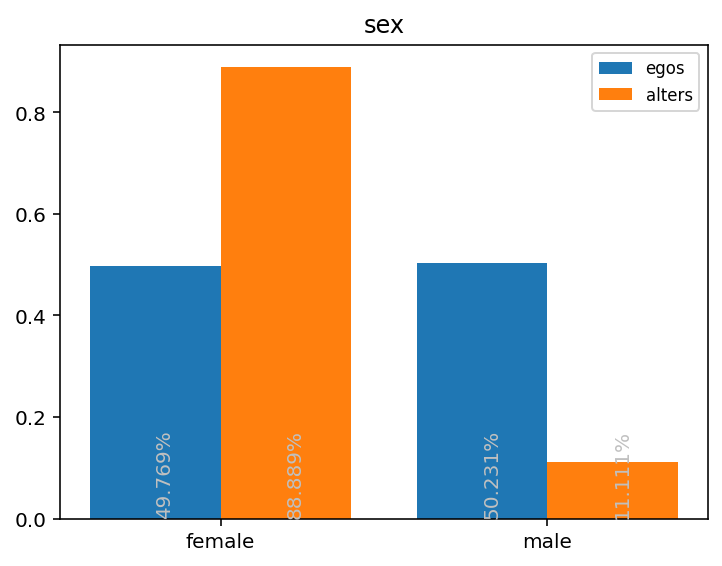

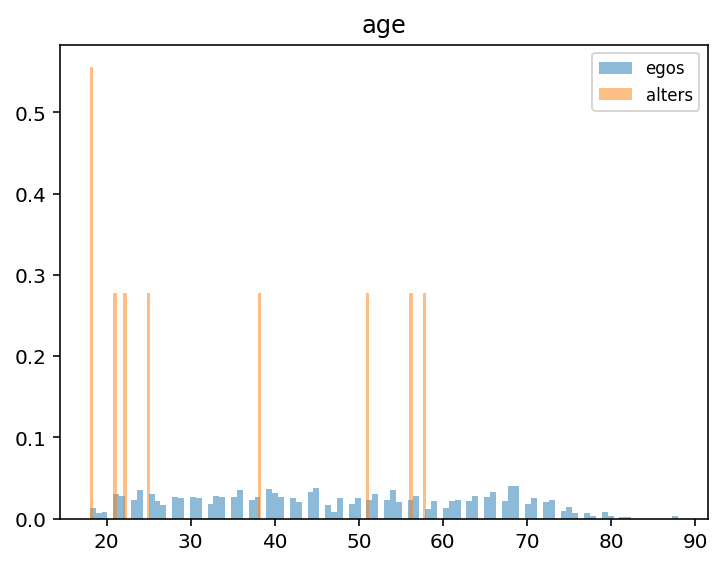

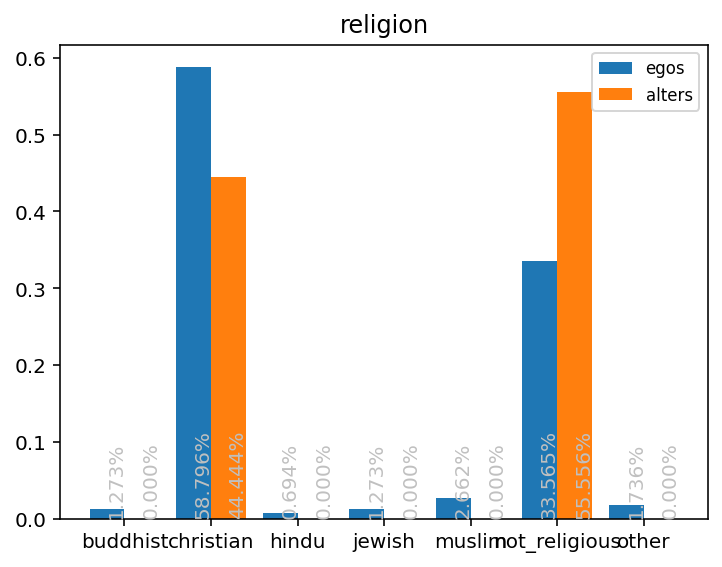

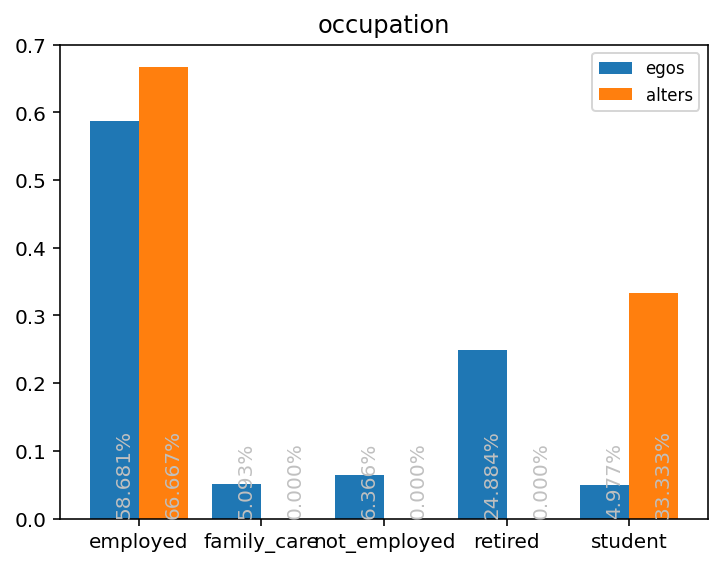

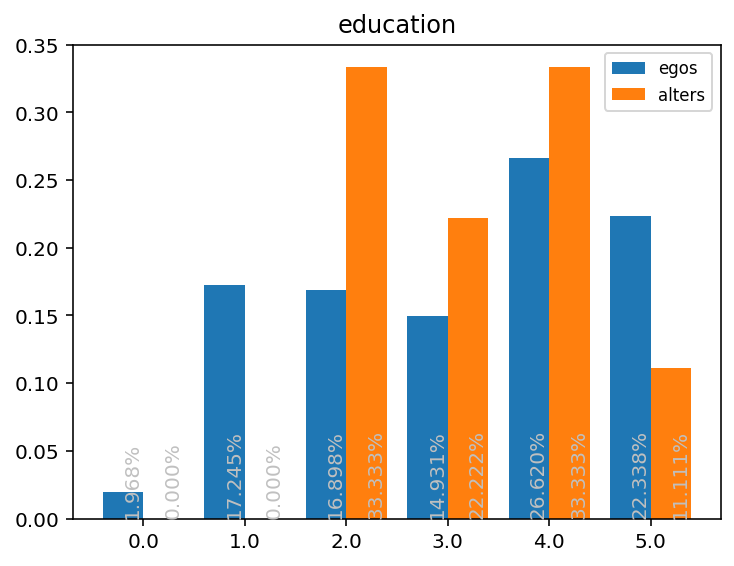

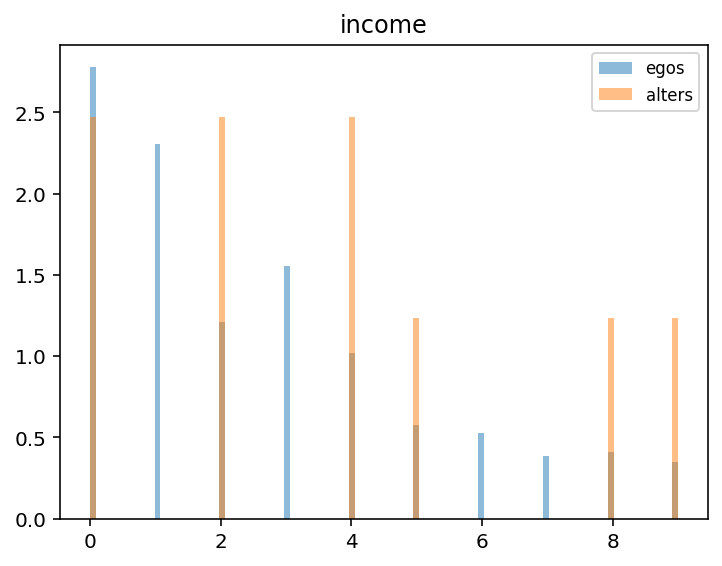

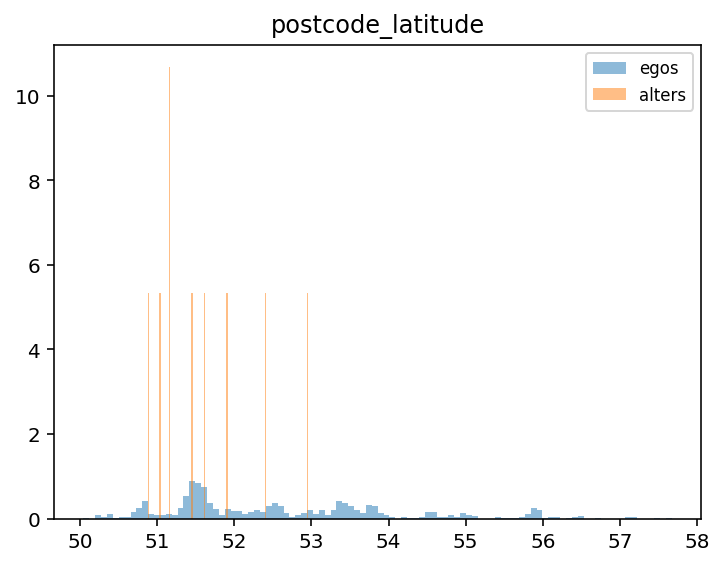

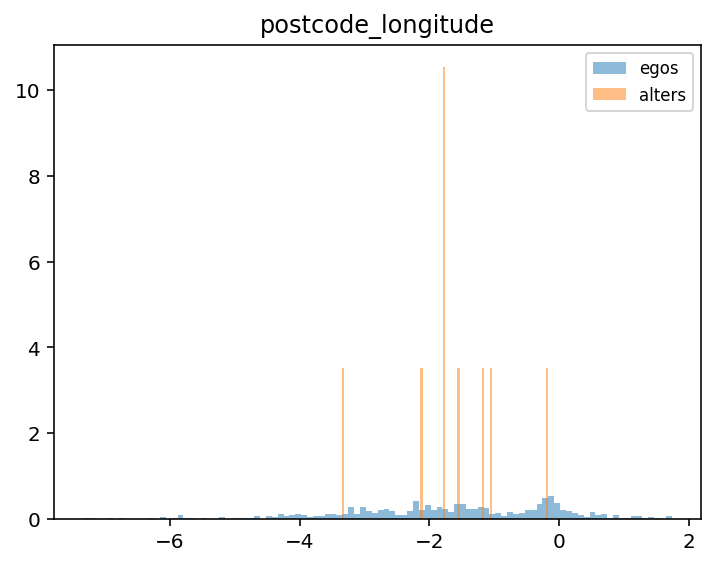

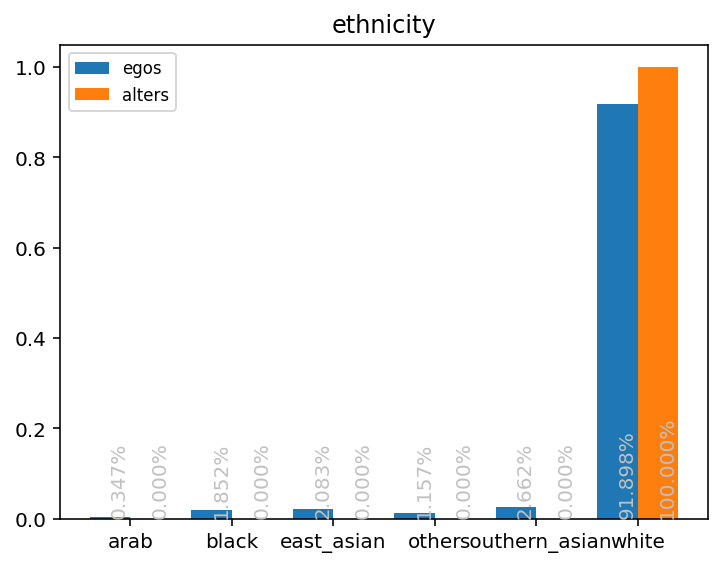

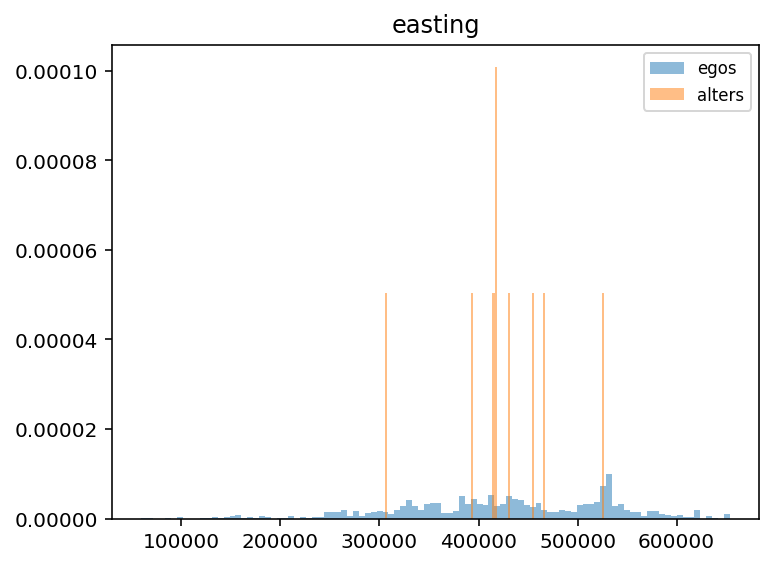

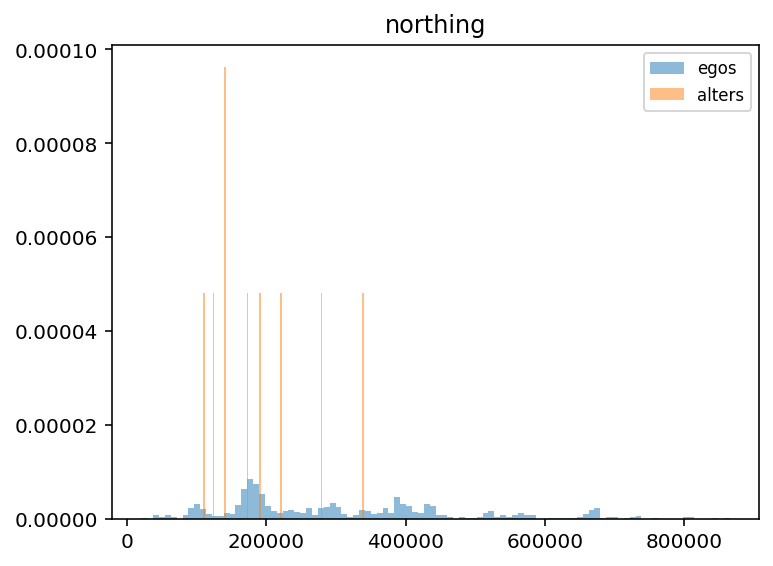

In [9]:
# Plot all attributes
for field, (dtype, _) in z.dtype.fields.items():
    if field == 'identifier':
        continue
    print(field)
    fig, ax = plt.subplots()
    ax.set_title(field)
    
    values = [None if pd.isnull(x) else x for x in z[field]]
    example_value, *_ = [x for x in values if x is not None]
    unique = set(values)
    nunique = len(unique)
    if dtype == object or nunique < 10:
        def key(x):
            if x is not None:
                return x
            if isinstance(example_value, str):
                return '_None'
            return -1e6
            
        labels = list(sorted(unique, key=key))
        x = np.arange(len(labels))
        for label, idx in zip(['egos', 'alters'], [egos, alters]):
            counter = {}
            for i in idx:
                value = values[i]
                counter[value] = counter.get(value, 0) + weight[i]
            y = np.asarray([counter.get(label, 0) for label in labels]) / sum(counter.values())
            offset = -.2 if label == 'egos' else .2
            ax.bar(x + offset, y, label=label, width=0.4)
            for i, value in enumerate(y):
                ax.text(i + offset, 0, '%.3f%%' % (100 * value), color='silver', 
                        rotation=90, va='bottom')
            
        ax.xaxis.set_ticks(x)
        ax.xaxis.set_ticklabels(map(str, labels))
    else:
        for label, idx in zip(['egos', 'alters'], [egos, alters]):
            xs = [values[i] for i in idx if not pd.isnull(values[i])]
            ax.hist(xs, label=label, alpha=.5, density=True, bins=100)
    
    ax.legend(loc='best')
    


bias
sex
age
occupation
religion
education
distance
income
ethnicity


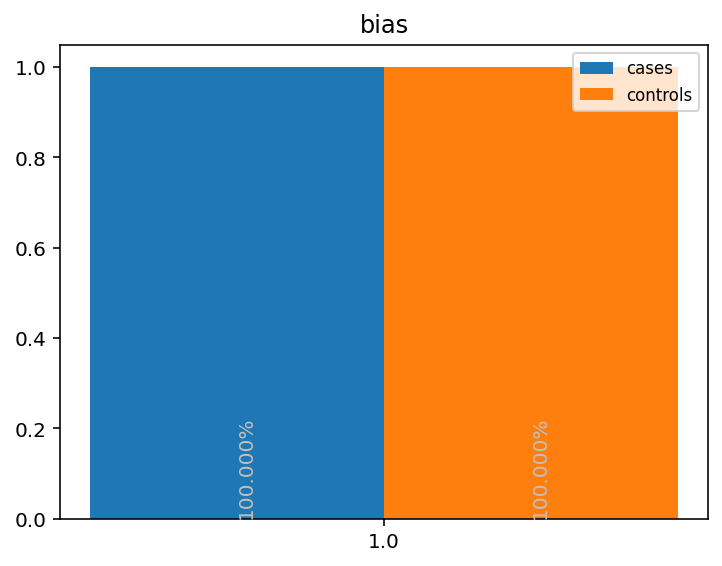

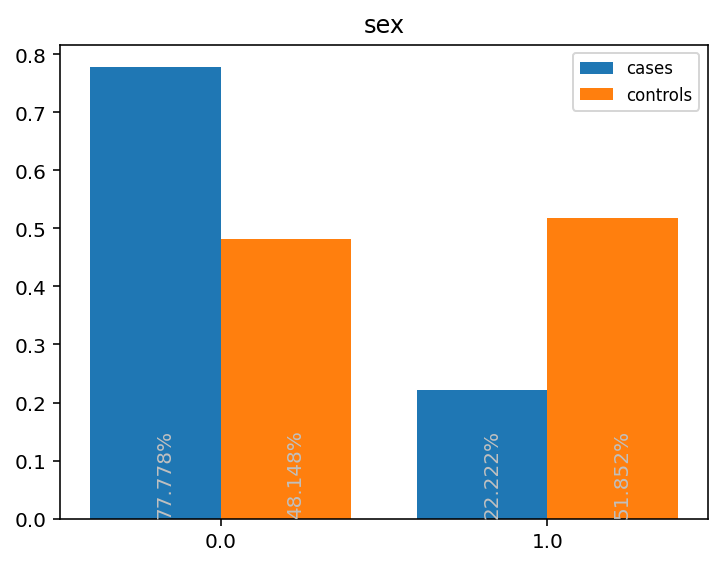

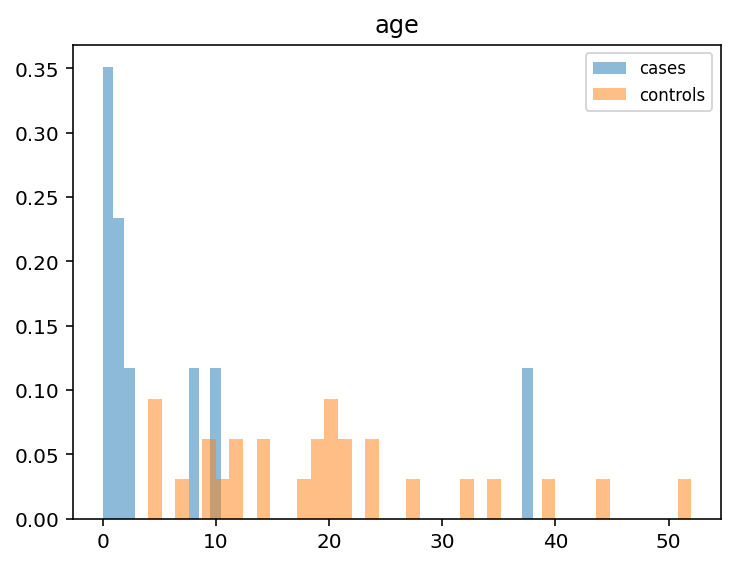

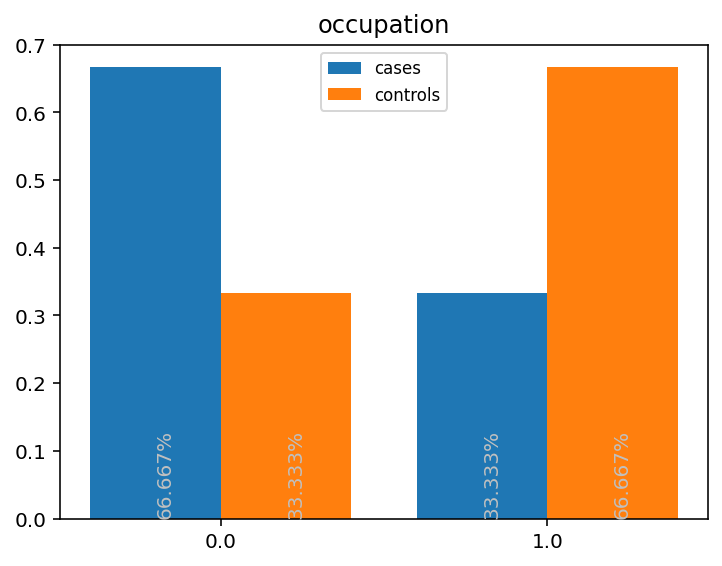

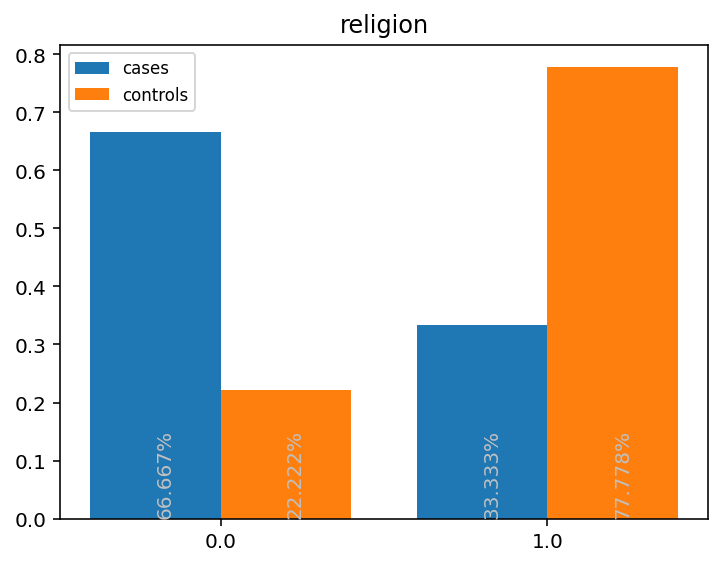

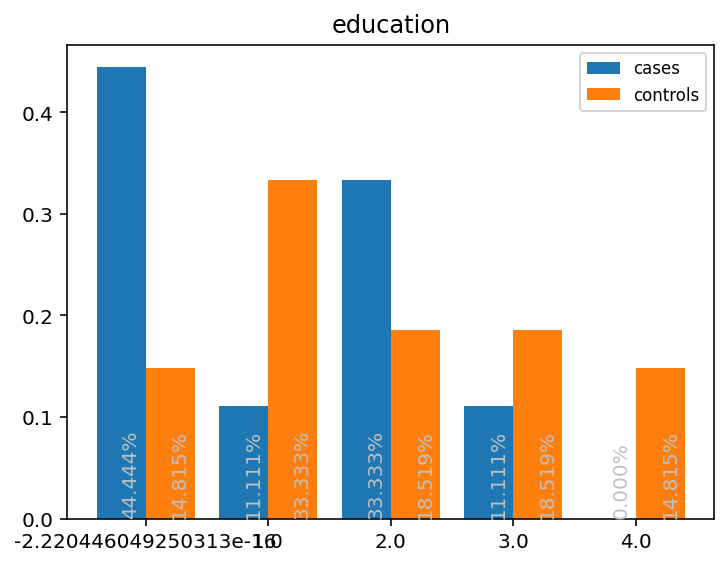

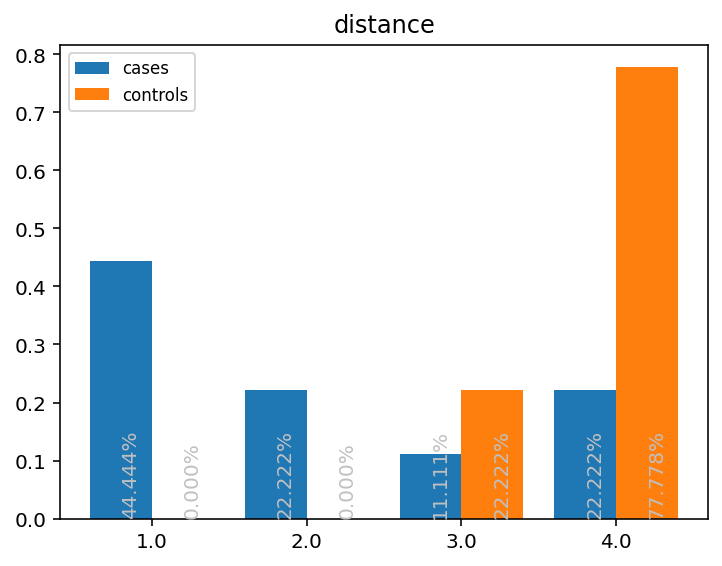

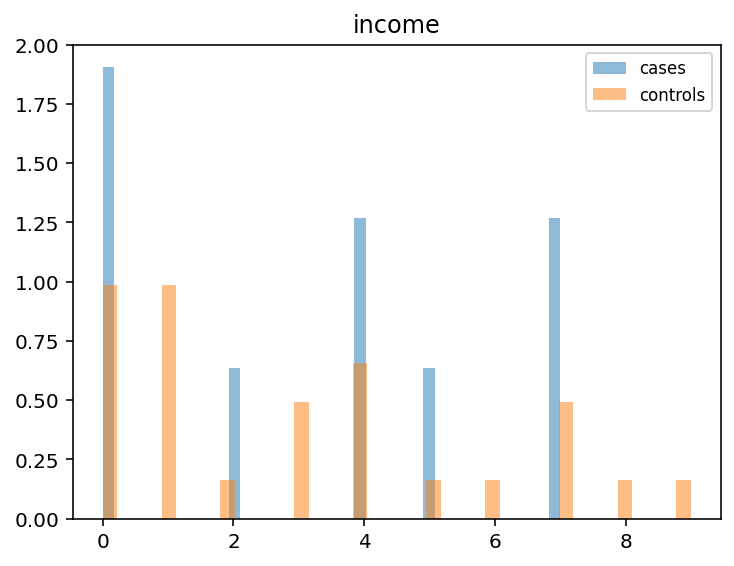

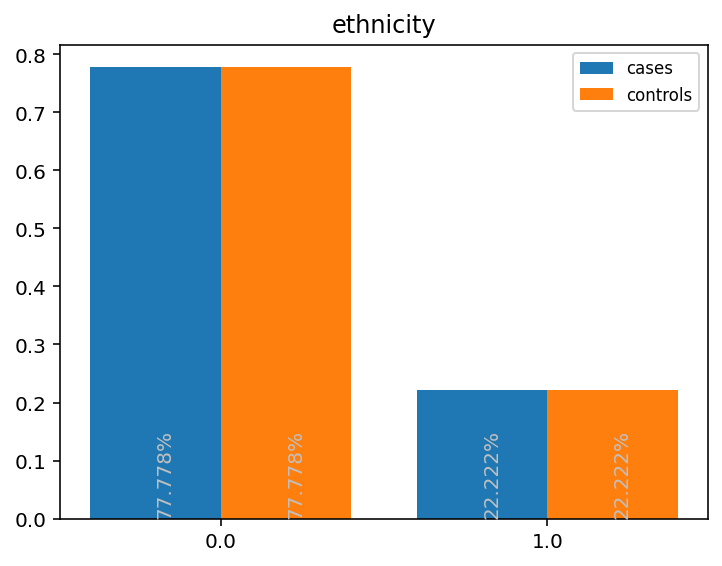

In [10]:
# Plot all features

for i, feature in enumerate(result['feature_names']):
    print(feature)
    fig, ax = plt.subplots()
    ax.set_title(feature)
    
    x_observed = result['x_observed']
    y_observed = result['y_observed']
    values = x_observed[:, i] * result['scales'][i] + result['offsets'][i]
    unique = set(values)
    nunique = len(unique)
    if values.dtype == object or nunique < 10:
        labels = list(sorted(unique))
        x = np.arange(len(labels))
        for label, idx in zip(['cases', 'controls'], [y_observed, ~y_observed]):
            counter = collections.Counter(values[idx])
            y = np.asarray([counter.get(label, 0) for label in labels]) / sum(counter.values())
            offset = -.2 if label == 'cases' else .2
            ax.bar(x + offset, y, label=label, width=0.4)
            
            for i, value in enumerate(y):
                ax.text(i + offset, 0, '%.3f%%' % (100 * value), color='silver', 
                        rotation=90, va='bottom')
            
        ax.xaxis.set_ticks(x)
        ax.xaxis.set_ticklabels(map(str, labels))
        
        
    else:
        for label, idx in zip(['cases', 'controls'], [y_observed, ~y_observed]):
            xs = values[idx]
            _ = ax.hist(xs, label=label, alpha=.5, density=True, bins=40)
    
    ax.legend(loc='best')

In [9]:
if result['args']['dataset'].startswith('usoc'):
    frac_alter_decade = np.mean(z.age[alters] % 10 == 0)
    frac_ego_decade = np.mean(z.age[egos] % 10 == 0)
    print("alters %.3f%% more likely to have age multiple of ten" % (100 * (frac_alter_decade / frac_ego_decade - 1)))

alters 67.198% more likely to have age multiple of ten


In [61]:
raw = pd.read_stata('../data/ALP_MS86_2014_12_01_11_06_48_weighted.dta')

In [65]:
raw.ethnicity.value_counts()

1 White/Caucasian                      2237
2 Black/African American                157
5 Other                                  64
4 Asian or Pacific Islander              38
3 American Indian or Alaskan Native      15
Name: ethnicity, dtype: int64

In [66]:
raw.hispaniclatino.value_counts()

2 No     2410
1 Yes     101
Name: hispaniclatino, dtype: int64

In [73]:
fltr = raw.hispaniclatino == '1 Yes'
for f in [fltr, ~fltr]:
    print(raw[f].ethnicity.value_counts() / f.sum())

5 Other                                0.465347
1 White/Caucasian                      0.435644
3 American Indian or Alaskan Native    0.059406
2 Black/African American               0.029703
4 Asian or Pacific Islander            0.009901
Name: ethnicity, dtype: float64
1 White/Caucasian                      0.909959
2 Black/African American               0.063900
4 Asian or Pacific Islander            0.015353
5 Other                                0.007054
3 American Indian or Alaskan Native    0.003734
Name: ethnicity, dtype: float64


In [71]:
raw.hispaniclatino

0        2 No
1        2 No
2        2 No
3        2 No
4        2 No
        ...  
2506     2 No
2507     2 No
2508     2 No
2509     2 No
2510    1 Yes
Name: hispaniclatino, Length: 2511, dtype: category
Categories (2, object): [1 Yes < 2 No]

In [70]:
fltr.sum()

0